In [1]:
%pylab inline
import specter
import desimodel.io
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/Users/sbailey/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#- Load DESI r-channel PSF
psf = desimodel.io.load_psf('r')

In [3]:
#- Setup some fake data: photons per bin
wave = np.arange(6000, 6010, 0.2)
nspec = 3
phot = np.ones( (nspec, len(wave)) )
phot[1, 20] = 100

In [4]:
#- Project those photons onto the CCD
xyrange = psf.xyrange([0,nspec], wave)
img = psf.project(wave, phot, xyrange=xyrange)

In [5]:
#- Make noisy integerized image
rdnoise = 3.0
pix = np.random.normal(rdnoise, size=img.shape).astype(int) + np.random.poisson(img)

#- Inverse variance estimated from the data itself (!)
#- i.e. biased but not cheating either
ivar = 1.0/(rdnoise**2 + pix.clip(0))

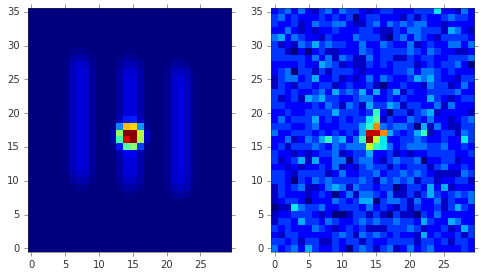

In [6]:
figure(figsize=(8,5))
subplot(121)
imshow(img)
subplot(122)
imshow(pix)

## Example extraction

In [7]:
from specter.extract import ex2d

In [8]:
flux, ivar, R = ex2d(pix, ivar, psf, specrange=[0, nspec], wavelengths=wave, xyrange=xyrange)

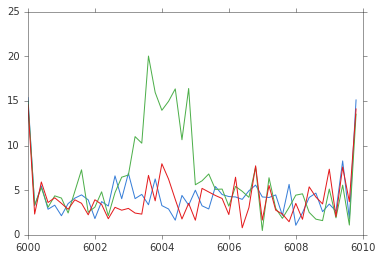

In [9]:
for i in range(nspec):
    plot(wave, flux[i])